In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1=pd.read_csv("noise45.csv",low_memory=False)
data2=pd.read_csv("noise55.csv",low_memory=False)
data3=pd.read_csv("noise65.csv",low_memory=False)

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
Y1=data1.pop("Class")
Y2=data2.pop("Class")
Y3=data3.pop("Class")

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [6]:
X_2d1 = tsne.fit_transform(data1)
X_2d2 = tsne.fit_transform(data2)
X_2d3 = tsne.fit_transform(data3)

In [7]:
target_names=["0","1","2","3","4","5","6","7","8","9"]
target_ids = range(len(target_names))

from matplotlib import pyplot as plt
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'silver', 'orange', 'purple'
#plt.savefig('t-SNE.fig', format='eps', dpi=1000)
#plt.savefig('t-SNE.eps', format='eps', dpi=1000)

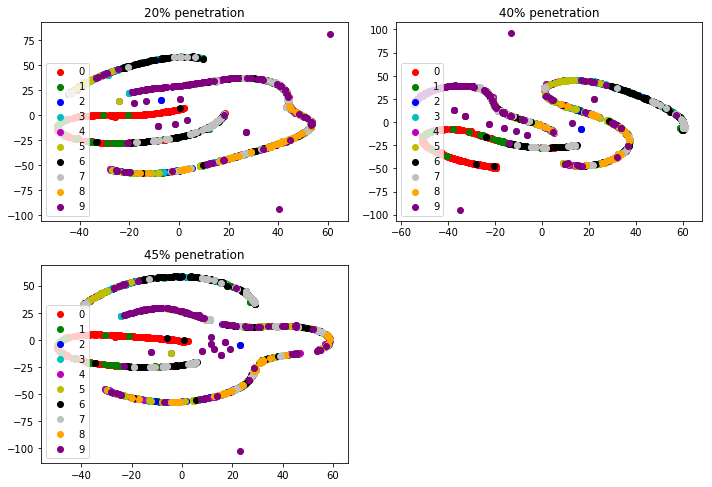

In [10]:
plt.figure(figsize=(10, 10))
plt.subplot(321)
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d1[Y1 == i, 0], X_2d1[Y1 == i, 1], c=c, label=label)
plt.title('20% penetration')
plt.legend( loc='lower left')
plt.subplot(322)

plt.title('40% penetration')
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d2[Y2 == i, 0], X_2d2[Y2 == i, 1], c=c, label=label)
plt.legend( loc='lower left')    
plt.subplot(323)
plt.title('45% penetration') 
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d3[Y3 == i, 0], X_2d3[Y3 == i, 1], c=c, label=label)
plt.legend( loc='lower left')
plt.tight_layout() 
plt.savefig('t-SNE.fig', format='eps', dpi=1000)
plt.show() 

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [12]:
import datetime
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from numpy import nan

now = datetime.datetime.now

Using TensorFlow backend.


In [13]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

In [14]:
from numpy import argmax
from keras.utils import to_categorical
nb_classes = 10
import time

In [15]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data1, Y1, random_state = 42)
Y_train1 = np_utils.to_categorical(y_train1, nb_classes)
Y_test1 = np_utils.to_categorical(y_test1, nb_classes)

###data2
X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, Y2, random_state = 42)
Y_train2 = np_utils.to_categorical(y_train2, nb_classes)
Y_test2 = np_utils.to_categorical(y_test2, nb_classes)

###data3
X_train3, X_test3, y_train3, y_test3 = train_test_split(data3, Y3, random_state = 42)
Y_train3 = np_utils.to_categorical(y_train3, nb_classes)
Y_test3 = np_utils.to_categorical(y_test3, nb_classes)

In [16]:
min_train1 = X_train1.min(axis=0)
range_train1 = (X_train1 - min_train1).max(axis=0)
X_train_scaled1 = (X_train1 - min_train1)/range_train1
X_test_scaled1 = (X_test1 - min_train1)/range_train1

###data2
min_train2 = X_train2.min(axis=0)
range_train2 = (X_train2 - min_train2).max(axis=0)
X_train_scaled2 = (X_train2 - min_train2)/range_train2
X_test_scaled2 = (X_test2 - min_train2)/range_train2

###data3
min_train3 = X_train3.min(axis=0)
range_train3 = (X_train3 - min_train3).max(axis=0)
X_train_scaled3 = (X_train3 - min_train3)/range_train1
X_test_scaled3 = (X_test3 - min_train3)/range_train1

In [17]:
X_2d1 = tsne.fit_transform(X_train_scaled1)
X_2d2 = tsne.fit_transform(X_train_scaled2)
X_2d3 = tsne.fit_transform(X_train_scaled3)

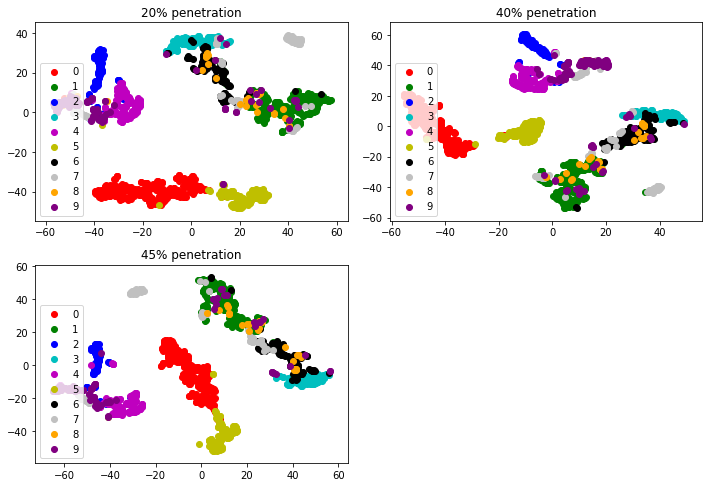

In [18]:
plt.figure(figsize=(10, 10))
plt.subplot(321)
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d1[y_train1 == i, 0], X_2d1[y_train1 == i, 1], c=c, label=label)
plt.title('20% penetration')
plt.legend( loc='lower left')
plt.subplot(322)  
plt.title('40% penetration')
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d2[y_train2 == i, 0], X_2d2[y_train2 == i, 1], c=c, label=label)   
plt.legend( loc='lower left')
plt.subplot(323)
plt.title('45% penetration') 
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d3[y_train3 == i, 0], X_2d3[y_train3 == i, 1], c=c, label=label)
plt.legend( loc='lower left')
plt.tight_layout() 
plt.savefig('t-SNE_scaled.fig', format='eps', dpi=1000)
plt.show()    

In [19]:
X_2c1 = tsne.fit_transform(X_test_scaled1)
X_2c2 = tsne.fit_transform(X_test_scaled2)
X_2c3 = tsne.fit_transform(X_test_scaled3)

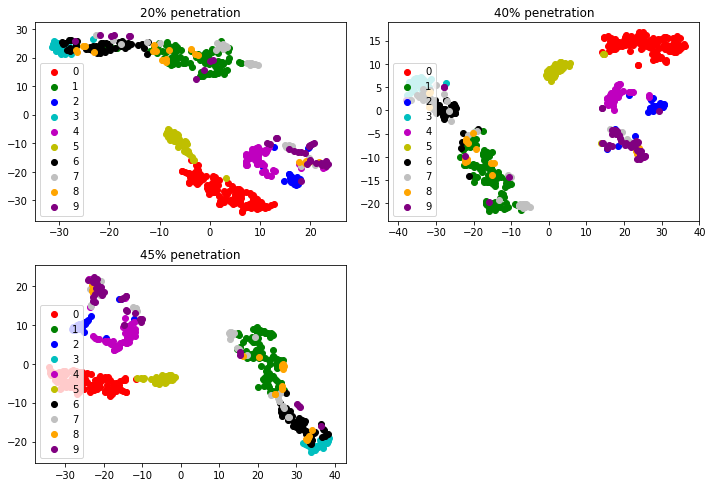

In [20]:
plt.figure(figsize=(10, 10))
plt.subplot(321)
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2c1[y_test1 == i, 0], X_2c1[y_test1 == i, 1], c=c, label=label)
plt.title('20% penetration')
plt.legend( loc='lower left')
plt.subplot(322)  
plt.title('40% penetration')
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2c2[y_test2 == i, 0], X_2c2[y_test2 == i, 1], c=c, label=label)   
plt.legend( loc='lower left')
plt.subplot(323)
plt.title('45% penetration') 
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2c3[y_test3 == i, 0], X_2c3[y_test3 == i, 1], c=c, label=label)
plt.legend( loc='lower left')
plt.tight_layout() 
plt.savefig('t-SNE_test_scaled.fig', format='eps', dpi=1000)
plt.show()    

In [37]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
#max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(6,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adam,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
t1=time.time()
hist1=m.fit(X_train_scaled1,
          Y_train1,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled1, Y_test1),
            
          callbacks=[early_stopping])
t2=time.time()
print("Training Time = %s"%(t2-t1))

Train on 1506 samples, validate on 503 samples
Epoch 1/3000
1506/1506 [==============================] - 1s 606us/step - loss: 2.2468 - acc: 0.1574 - val_loss: 2.1637 - val_acc: 0.2465
Epoch 2/3000
1506/1506 [==============================] - 0s 72us/step - loss: 2.1480 - acc: 0.2211 - val_loss: 2.0698 - val_acc: 0.2465
Epoch 3/3000
1506/1506 [==============================] - 0s 70us/step - loss: 2.0577 - acc: 0.2231 - val_loss: 1.9699 - val_acc: 0.2565
Epoch 4/3000
1506/1506 [==============================] - 0s 77us/step - loss: 1.9347 - acc: 0.3659 - val_loss: 1.8239 - val_acc: 0.4791
Epoch 5/3000
1506/1506 [==============================] - 0s 69us/step - loss: 1.7606 - acc: 0.4721 - val_loss: 1.6519 - val_acc: 0.4990
Epoch 6/3000
1506/1506 [==============================] - 0s 65us/step - loss: 1.5868 - acc: 0.4721 - val_loss: 1.5166 - val_acc: 0.4930
Epoch 7/3000
1506/1506 [==============================] - 0s 69us/step - loss: 1.4585 - acc: 0.4920 - val_loss: 1.4155 - val_acc: 

1506/1506 [==============================] - 0s 69us/step - loss: 0.3619 - acc: 0.8918 - val_loss: 0.4322 - val_acc: 0.8688
Epoch 61/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.3562 - acc: 0.8958 - val_loss: 0.4341 - val_acc: 0.8688
Epoch 62/3000
1506/1506 [==============================] - 0s 61us/step - loss: 0.3542 - acc: 0.8964 - val_loss: 0.4322 - val_acc: 0.8588
Epoch 63/3000
1506/1506 [==============================] - 0s 61us/step - loss: 0.3539 - acc: 0.8964 - val_loss: 0.4242 - val_acc: 0.8708
Epoch 64/3000
1506/1506 [==============================] - 0s 77us/step - loss: 0.3523 - acc: 0.8971 - val_loss: 0.4278 - val_acc: 0.8708
Epoch 65/3000
1506/1506 [==============================] - 0s 104us/step - loss: 0.3574 - acc: 0.8971 - val_loss: 0.4355 - val_acc: 0.8648
Epoch 66/3000
1506/1506 [==============================] - 0s 101us/step - loss: 0.3531 - acc: 0.8984 - val_loss: 0.4259 - val_acc: 0.8688
Epoch 67/3000
1506/1506 [=====================

1506/1506 [==============================] - 0s 88us/step - loss: 0.2999 - acc: 0.9057 - val_loss: 0.3728 - val_acc: 0.8827
Epoch 120/3000
1506/1506 [==============================] - 0s 122us/step - loss: 0.2948 - acc: 0.9064 - val_loss: 0.3749 - val_acc: 0.8827
Epoch 121/3000
1506/1506 [==============================] - 0s 159us/step - loss: 0.2952 - acc: 0.9057 - val_loss: 0.3786 - val_acc: 0.8807
Epoch 122/3000
1506/1506 [==============================] - 0s 77us/step - loss: 0.3066 - acc: 0.9017 - val_loss: 0.3786 - val_acc: 0.8767
Epoch 123/3000
1506/1506 [==============================] - 0s 68us/step - loss: 0.2954 - acc: 0.9004 - val_loss: 0.3692 - val_acc: 0.8728
Epoch 124/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.2945 - acc: 0.9017 - val_loss: 0.3670 - val_acc: 0.8767
Epoch 125/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.2947 - acc: 0.9064 - val_loss: 0.3748 - val_acc: 0.8787
Epoch 126/3000
1506/1506 [==============

Epoch 178/3000
1506/1506 [==============================] - 0s 52us/step - loss: 0.2684 - acc: 0.9090 - val_loss: 0.3462 - val_acc: 0.8827
Epoch 179/3000
1506/1506 [==============================] - 0s 62us/step - loss: 0.2655 - acc: 0.9124 - val_loss: 0.3474 - val_acc: 0.8847
Epoch 180/3000
1506/1506 [==============================] - 0s 62us/step - loss: 0.2644 - acc: 0.9117 - val_loss: 0.3561 - val_acc: 0.8847
Epoch 181/3000
1506/1506 [==============================] - 0s 52us/step - loss: 0.2637 - acc: 0.9130 - val_loss: 0.3526 - val_acc: 0.8807
Epoch 182/3000
1506/1506 [==============================] - 0s 62us/step - loss: 0.2645 - acc: 0.9150 - val_loss: 0.3434 - val_acc: 0.8867
Epoch 183/3000
1506/1506 [==============================] - 0s 81us/step - loss: 0.2646 - acc: 0.9137 - val_loss: 0.3461 - val_acc: 0.8867
Epoch 184/3000
1506/1506 [==============================] - 0s 62us/step - loss: 0.2641 - acc: 0.9130 - val_loss: 0.3468 - val_acc: 0.8807
Epoch 185/3000
1506/1506 [=

Epoch 237/3000
1506/1506 [==============================] - 0s 54us/step - loss: 0.2466 - acc: 0.9130 - val_loss: 0.3360 - val_acc: 0.8926
Epoch 238/3000
1506/1506 [==============================] - 0s 68us/step - loss: 0.2592 - acc: 0.9177 - val_loss: 0.3316 - val_acc: 0.8907
Epoch 239/3000
1506/1506 [==============================] - 0s 53us/step - loss: 0.2461 - acc: 0.9157 - val_loss: 0.3228 - val_acc: 0.8907
Epoch 240/3000
1506/1506 [==============================] - 0s 62us/step - loss: 0.2451 - acc: 0.9177 - val_loss: 0.3288 - val_acc: 0.8807
Epoch 241/3000
1506/1506 [==============================] - 0s 52us/step - loss: 0.2448 - acc: 0.9163 - val_loss: 0.3269 - val_acc: 0.8946
Epoch 242/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.2419 - acc: 0.9163 - val_loss: 0.3226 - val_acc: 0.8907
Epoch 243/3000
1506/1506 [==============================] - 0s 56us/step - loss: 0.2431 - acc: 0.9183 - val_loss: 0.3240 - val_acc: 0.8887
Epoch 244/3000
1506/1506 [=

Epoch 296/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.2312 - acc: 0.9190 - val_loss: 0.3091 - val_acc: 0.8966
Epoch 297/3000
1506/1506 [==============================] - 0s 62us/step - loss: 0.2283 - acc: 0.9250 - val_loss: 0.3106 - val_acc: 0.9006
Epoch 298/3000
1506/1506 [==============================] - 0s 62us/step - loss: 0.2327 - acc: 0.9203 - val_loss: 0.3139 - val_acc: 0.8887
Epoch 299/3000
1506/1506 [==============================] - 0s 80us/step - loss: 0.2285 - acc: 0.9223 - val_loss: 0.3072 - val_acc: 0.8986
Epoch 300/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.2279 - acc: 0.9216 - val_loss: 0.3097 - val_acc: 0.9046
Epoch 301/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.2258 - acc: 0.9270 - val_loss: 0.3179 - val_acc: 0.9046
Epoch 302/3000
1506/1506 [==============================] - 0s 61us/step - loss: 0.2283 - acc: 0.9197 - val_loss: 0.3079 - val_acc: 0.9026
Epoch 303/3000
1506/1506 [=

Epoch 355/3000
1506/1506 [==============================] - 0s 106us/step - loss: 0.2166 - acc: 0.9270 - val_loss: 0.3125 - val_acc: 0.9205
Epoch 356/3000
1506/1506 [==============================] - 0s 130us/step - loss: 0.2382 - acc: 0.9223 - val_loss: 0.2960 - val_acc: 0.9225
Epoch 357/3000
1506/1506 [==============================] - 0s 114us/step - loss: 0.2155 - acc: 0.9263 - val_loss: 0.2921 - val_acc: 0.9105
Epoch 358/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.2174 - acc: 0.9243 - val_loss: 0.2934 - val_acc: 0.8966
Epoch 359/3000
1506/1506 [==============================] - 0s 72us/step - loss: 0.2163 - acc: 0.9236 - val_loss: 0.2834 - val_acc: 0.9145
Epoch 360/3000
1506/1506 [==============================] - 0s 96us/step - loss: 0.2160 - acc: 0.9256 - val_loss: 0.2856 - val_acc: 0.9066
Epoch 361/3000
1506/1506 [==============================] - 0s 135us/step - loss: 0.2141 - acc: 0.9270 - val_loss: 0.2948 - val_acc: 0.9125
Epoch 362/3000
1506/150

Epoch 414/3000
1506/1506 [==============================] - 0s 106us/step - loss: 0.2086 - acc: 0.9323 - val_loss: 0.2722 - val_acc: 0.9245
Epoch 415/3000
1506/1506 [==============================] - 0s 122us/step - loss: 0.2049 - acc: 0.9303 - val_loss: 0.2785 - val_acc: 0.9125
Epoch 416/3000
1506/1506 [==============================] - 0s 117us/step - loss: 0.2060 - acc: 0.9283 - val_loss: 0.2791 - val_acc: 0.9105
Epoch 417/3000
1506/1506 [==============================] - 0s 130us/step - loss: 0.2080 - acc: 0.9343 - val_loss: 0.2956 - val_acc: 0.9006
Epoch 418/3000
1506/1506 [==============================] - 0s 135us/step - loss: 0.2079 - acc: 0.9316 - val_loss: 0.2747 - val_acc: 0.9185
Epoch 419/3000
1506/1506 [==============================] - 0s 143us/step - loss: 0.2102 - acc: 0.9316 - val_loss: 0.2746 - val_acc: 0.9165
Epoch 420/3000
1506/1506 [==============================] - 0s 125us/step - loss: 0.2057 - acc: 0.9316 - val_loss: 0.2799 - val_acc: 0.9026
Epoch 421/3000
1506/

In [47]:
testd=pd.read_csv("test.csv")

In [48]:
Y=testd.pop("Class")
Y_test = np_utils.to_categorical(Y, nb_classes)

In [49]:
X_test = (testd - min_train2)/range_train2

In [50]:
t3=time.time()
score, acc = m.evaluate(X_test,Y_test)
t4=time.time()
print("Training Time = %s"%(t4-t3))
print('Test score:', score)
print('Test accuracy:', acc)

2/2 [==============================] - 0s 2ms/step
Training Time = 0.008002042770385742
Test score: 0.000336825585691
Test accuracy: 1.0


In [24]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
#max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(6,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adam,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist2=m.fit(X_train_scaled2,
          Y_train2,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled2, Y_test2),
            
          callbacks=[early_stopping])

Train on 1505 samples, validate on 502 samples
Epoch 1/3000
1505/1505 [==============================] - 1s 481us/step - loss: 2.2398 - acc: 0.1741 - val_loss: 2.1660 - val_acc: 0.2331
Epoch 2/3000
1505/1505 [==============================] - 0s 83us/step - loss: 2.1046 - acc: 0.2186 - val_loss: 2.0443 - val_acc: 0.2371
Epoch 3/3000
1505/1505 [==============================] - 0s 101us/step - loss: 1.9979 - acc: 0.2219 - val_loss: 1.9340 - val_acc: 0.2470
Epoch 4/3000
1505/1505 [==============================] - 0s 85us/step - loss: 1.8729 - acc: 0.2731 - val_loss: 1.7871 - val_acc: 0.3426
Epoch 5/3000
1505/1505 [==============================] - 0s 74us/step - loss: 1.7149 - acc: 0.4100 - val_loss: 1.6268 - val_acc: 0.5418
Epoch 6/3000
1505/1505 [==============================] - 0s 72us/step - loss: 1.5675 - acc: 0.4977 - val_loss: 1.4835 - val_acc: 0.5578
Epoch 7/3000
1505/1505 [==============================] - 0s 72us/step - loss: 1.4222 - acc: 0.5056 - val_loss: 1.3535 - val_acc:

1505/1505 [==============================] - 0s 62us/step - loss: 0.3622 - acc: 0.8970 - val_loss: 0.4357 - val_acc: 0.8785
Epoch 60/3000
1505/1505 [==============================] - 0s 52us/step - loss: 0.3701 - acc: 0.8917 - val_loss: 0.4242 - val_acc: 0.8785
Epoch 61/3000
1505/1505 [==============================] - 0s 59us/step - loss: 0.3588 - acc: 0.8930 - val_loss: 0.4218 - val_acc: 0.8745
Epoch 62/3000
1505/1505 [==============================] - 0s 61us/step - loss: 0.3582 - acc: 0.8997 - val_loss: 0.4206 - val_acc: 0.8765
Epoch 63/3000
1505/1505 [==============================] - 0s 61us/step - loss: 0.3552 - acc: 0.8977 - val_loss: 0.4197 - val_acc: 0.8745
Epoch 64/3000
1505/1505 [==============================] - 0s 64us/step - loss: 0.3528 - acc: 0.8937 - val_loss: 0.4173 - val_acc: 0.8765
Epoch 65/3000
1505/1505 [==============================] - 0s 52us/step - loss: 0.3497 - acc: 0.8970 - val_loss: 0.4201 - val_acc: 0.8785
Epoch 66/3000
1505/1505 [=======================

1505/1505 [==============================] - 0s 66us/step - loss: 0.2998 - acc: 0.9070 - val_loss: 0.3762 - val_acc: 0.8904
Epoch 119/3000
1505/1505 [==============================] - 0s 58us/step - loss: 0.2983 - acc: 0.9090 - val_loss: 0.3734 - val_acc: 0.8924
Epoch 120/3000
1505/1505 [==============================] - 0s 64us/step - loss: 0.2984 - acc: 0.9076 - val_loss: 0.3740 - val_acc: 0.8924
Epoch 121/3000
1505/1505 [==============================] - 0s 64us/step - loss: 0.2952 - acc: 0.9090 - val_loss: 0.3701 - val_acc: 0.8904
Epoch 122/3000
1505/1505 [==============================] - 0s 66us/step - loss: 0.2954 - acc: 0.9083 - val_loss: 0.3779 - val_acc: 0.8924
Epoch 123/3000
1505/1505 [==============================] - 0s 66us/step - loss: 0.2946 - acc: 0.9083 - val_loss: 0.3742 - val_acc: 0.8904
Epoch 124/3000
1505/1505 [==============================] - 0s 64us/step - loss: 0.2948 - acc: 0.9070 - val_loss: 0.3807 - val_acc: 0.8924
Epoch 125/3000
1505/1505 [================

Epoch 177/3000
1505/1505 [==============================] - 0s 66us/step - loss: 0.2676 - acc: 0.9156 - val_loss: 0.3550 - val_acc: 0.8964
Epoch 178/3000
1505/1505 [==============================] - 0s 61us/step - loss: 0.2648 - acc: 0.9150 - val_loss: 0.3496 - val_acc: 0.9004
Epoch 179/3000
1505/1505 [==============================] - 0s 67us/step - loss: 0.2667 - acc: 0.9150 - val_loss: 0.3521 - val_acc: 0.8964
Epoch 180/3000
1505/1505 [==============================] - 0s 68us/step - loss: 0.2652 - acc: 0.9150 - val_loss: 0.3512 - val_acc: 0.8944
Epoch 181/3000
1505/1505 [==============================] - 0s 64us/step - loss: 0.2624 - acc: 0.9169 - val_loss: 0.3455 - val_acc: 0.8924
Epoch 182/3000
1505/1505 [==============================] - 0s 65us/step - loss: 0.2614 - acc: 0.9176 - val_loss: 0.3472 - val_acc: 0.8924
Epoch 183/3000
1505/1505 [==============================] - 0s 64us/step - loss: 0.2613 - acc: 0.9143 - val_loss: 0.3411 - val_acc: 0.9004
Epoch 184/3000
1505/1505 [=

Epoch 236/3000
1505/1505 [==============================] - 0s 66us/step - loss: 0.2434 - acc: 0.9223 - val_loss: 0.3313 - val_acc: 0.9044
Epoch 237/3000
1505/1505 [==============================] - 0s 58us/step - loss: 0.2547 - acc: 0.9183 - val_loss: 0.3425 - val_acc: 0.9004
Epoch 238/3000
1505/1505 [==============================] - 0s 104us/step - loss: 0.2405 - acc: 0.9183 - val_loss: 0.3318 - val_acc: 0.9024
Epoch 239/3000
1505/1505 [==============================] - 0s 93us/step - loss: 0.2360 - acc: 0.9236 - val_loss: 0.3242 - val_acc: 0.9064
Epoch 240/3000
1505/1505 [==============================] - 0s 90us/step - loss: 0.2397 - acc: 0.9203 - val_loss: 0.3295 - val_acc: 0.8984
Epoch 241/3000
1505/1505 [==============================] - 0s 64us/step - loss: 0.2388 - acc: 0.9209 - val_loss: 0.3317 - val_acc: 0.9024
Epoch 242/3000
1505/1505 [==============================] - 0s 66us/step - loss: 0.2406 - acc: 0.9209 - val_loss: 0.3294 - val_acc: 0.9084
Epoch 243/3000
1505/1505 [

1505/1505 [==============================] - 0s 66us/step - loss: 0.2257 - acc: 0.9243 - val_loss: 0.3148 - val_acc: 0.9064
Epoch 295/3000
1505/1505 [==============================] - 0s 63us/step - loss: 0.2175 - acc: 0.9289 - val_loss: 0.3128 - val_acc: 0.9044
Epoch 296/3000
1505/1505 [==============================] - 0s 64us/step - loss: 0.2200 - acc: 0.9256 - val_loss: 0.3112 - val_acc: 0.9143
Epoch 297/3000
1505/1505 [==============================] - 0s 64us/step - loss: 0.2189 - acc: 0.9256 - val_loss: 0.3137 - val_acc: 0.9143
Epoch 298/3000
1505/1505 [==============================] - 0s 62us/step - loss: 0.2173 - acc: 0.9223 - val_loss: 0.3099 - val_acc: 0.9124
Epoch 299/3000
1505/1505 [==============================] - 0s 65us/step - loss: 0.2171 - acc: 0.9256 - val_loss: 0.3156 - val_acc: 0.9084
Epoch 300/3000
1505/1505 [==============================] - 0s 64us/step - loss: 0.2169 - acc: 0.9262 - val_loss: 0.3209 - val_acc: 0.9124
Epoch 301/3000
1505/1505 [================

Epoch 353/3000
1505/1505 [==============================] - 0s 66us/step - loss: 0.2409 - acc: 0.9150 - val_loss: 0.3055 - val_acc: 0.9004
Epoch 354/3000
1505/1505 [==============================] - 0s 60us/step - loss: 0.2035 - acc: 0.9276 - val_loss: 0.2973 - val_acc: 0.9064
Epoch 355/3000
1505/1505 [==============================] - 0s 61us/step - loss: 0.2024 - acc: 0.9296 - val_loss: 0.3033 - val_acc: 0.9143
Epoch 356/3000
1505/1505 [==============================] - 0s 64us/step - loss: 0.2157 - acc: 0.9302 - val_loss: 0.3016 - val_acc: 0.9064
Epoch 357/3000
1505/1505 [==============================] - 0s 62us/step - loss: 0.2005 - acc: 0.9256 - val_loss: 0.2983 - val_acc: 0.9084
Epoch 358/3000
1505/1505 [==============================] - 0s 64us/step - loss: 0.2037 - acc: 0.9302 - val_loss: 0.3022 - val_acc: 0.9104
Epoch 359/3000
1505/1505 [==============================] - 0s 61us/step - loss: 0.2035 - acc: 0.9282 - val_loss: 0.2980 - val_acc: 0.9044
Epoch 360/3000
1505/1505 [=

Epoch 412/3000
1505/1505 [==============================] - 0s 66us/step - loss: 0.2101 - acc: 0.9282 - val_loss: 0.2985 - val_acc: 0.9084
Epoch 413/3000
1505/1505 [==============================] - 0s 61us/step - loss: 0.1906 - acc: 0.9316 - val_loss: 0.2885 - val_acc: 0.9143
Epoch 414/3000
1505/1505 [==============================] - 0s 60us/step - loss: 0.1922 - acc: 0.9316 - val_loss: 0.2825 - val_acc: 0.9163
Epoch 415/3000
1505/1505 [==============================] - 0s 55us/step - loss: 0.1905 - acc: 0.9316 - val_loss: 0.2906 - val_acc: 0.9124
Epoch 416/3000
1505/1505 [==============================] - 0s 58us/step - loss: 0.1881 - acc: 0.9336 - val_loss: 0.2910 - val_acc: 0.9044
Epoch 417/3000
1505/1505 [==============================] - 0s 61us/step - loss: 0.1890 - acc: 0.9309 - val_loss: 0.2938 - val_acc: 0.9183
Epoch 418/3000
1505/1505 [==============================] - 0s 64us/step - loss: 0.1911 - acc: 0.9355 - val_loss: 0.2857 - val_acc: 0.9183
Epoch 419/3000
1505/1505 [=

In [25]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
#max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(6,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adam,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist3=m.fit(X_train_scaled3,
          Y_train3,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled3, Y_test3),
            
          callbacks=[early_stopping])

Train on 1509 samples, validate on 503 samples
Epoch 1/3000
1509/1509 [==============================] - 1s 435us/step - loss: 2.2272 - acc: 0.2558 - val_loss: 2.1192 - val_acc: 0.2346
Epoch 2/3000
1509/1509 [==============================] - 0s 69us/step - loss: 2.0340 - acc: 0.2326 - val_loss: 1.9358 - val_acc: 0.3698
Epoch 3/3000
1509/1509 [==============================] - 0s 61us/step - loss: 1.8367 - acc: 0.3996 - val_loss: 1.7496 - val_acc: 0.4414
Epoch 4/3000
1509/1509 [==============================] - 0s 76us/step - loss: 1.6400 - acc: 0.4089 - val_loss: 1.5918 - val_acc: 0.4592
Epoch 5/3000
1509/1509 [==============================] - 0s 68us/step - loss: 1.4882 - acc: 0.4387 - val_loss: 1.4841 - val_acc: 0.4990
Epoch 6/3000
1509/1509 [==============================] - 0s 67us/step - loss: 1.3721 - acc: 0.4904 - val_loss: 1.3973 - val_acc: 0.5368
Epoch 7/3000
1509/1509 [==============================] - 0s 74us/step - loss: 1.2762 - acc: 0.5394 - val_loss: 1.3192 - val_acc: 

Epoch 60/3000
1509/1509 [==============================] - 0s 64us/step - loss: 0.3191 - acc: 0.9046 - val_loss: 0.4396 - val_acc: 0.8787
Epoch 61/3000
1509/1509 [==============================] - 0s 60us/step - loss: 0.3205 - acc: 0.9046 - val_loss: 0.4423 - val_acc: 0.8748
Epoch 62/3000
1509/1509 [==============================] - 0s 64us/step - loss: 0.3204 - acc: 0.9039 - val_loss: 0.4582 - val_acc: 0.8787
Epoch 63/3000
1509/1509 [==============================] - 0s 58us/step - loss: 0.3183 - acc: 0.9052 - val_loss: 0.4327 - val_acc: 0.8767
Epoch 64/3000
1509/1509 [==============================] - 0s 64us/step - loss: 0.3146 - acc: 0.9006 - val_loss: 0.4443 - val_acc: 0.8728
Epoch 65/3000
1509/1509 [==============================] - 0s 62us/step - loss: 0.3133 - acc: 0.9079 - val_loss: 0.4409 - val_acc: 0.8767
Epoch 66/3000
1509/1509 [==============================] - 0s 60us/step - loss: 0.3121 - acc: 0.9039 - val_loss: 0.4376 - val_acc: 0.8708
Epoch 67/3000
1509/1509 [=========

Epoch 119/3000
1509/1509 [==============================] - 0s 66us/step - loss: 0.2734 - acc: 0.9105 - val_loss: 0.4008 - val_acc: 0.8787
Epoch 120/3000
1509/1509 [==============================] - 0s 61us/step - loss: 0.2695 - acc: 0.9145 - val_loss: 0.4049 - val_acc: 0.8847
Epoch 121/3000
1509/1509 [==============================] - 0s 63us/step - loss: 0.2717 - acc: 0.9132 - val_loss: 0.3885 - val_acc: 0.8827
Epoch 122/3000
1509/1509 [==============================] - 0s 60us/step - loss: 0.2661 - acc: 0.9125 - val_loss: 0.4023 - val_acc: 0.8807
Epoch 123/3000
1509/1509 [==============================] - 0s 64us/step - loss: 0.2656 - acc: 0.9125 - val_loss: 0.3965 - val_acc: 0.8827
Epoch 124/3000
1509/1509 [==============================] - 0s 64us/step - loss: 0.2633 - acc: 0.9158 - val_loss: 0.3927 - val_acc: 0.8767
Epoch 125/3000
1509/1509 [==============================] - 0s 64us/step - loss: 0.2642 - acc: 0.9125 - val_loss: 0.3969 - val_acc: 0.8827
Epoch 126/3000
1509/1509 [=

1509/1509 [==============================] - 0s 66us/step - loss: 0.2331 - acc: 0.9211 - val_loss: 0.3797 - val_acc: 0.8887
Epoch 178/3000
1509/1509 [==============================] - 0s 64us/step - loss: 0.2339 - acc: 0.9205 - val_loss: 0.3842 - val_acc: 0.8887
Epoch 179/3000
1509/1509 [==============================] - 0s 64us/step - loss: 0.2313 - acc: 0.9225 - val_loss: 0.3809 - val_acc: 0.8867
Epoch 180/3000
1509/1509 [==============================] - 0s 60us/step - loss: 0.2318 - acc: 0.9185 - val_loss: 0.3798 - val_acc: 0.8926
Epoch 181/3000
1509/1509 [==============================] - 0s 61us/step - loss: 0.2325 - acc: 0.9251 - val_loss: 0.3791 - val_acc: 0.8867
Epoch 182/3000
1509/1509 [==============================] - 0s 60us/step - loss: 0.2325 - acc: 0.9225 - val_loss: 0.3859 - val_acc: 0.8926
Epoch 183/3000
1509/1509 [==============================] - 0s 60us/step - loss: 0.2301 - acc: 0.9198 - val_loss: 0.3749 - val_acc: 0.8926
Epoch 184/3000
1509/1509 [================

1509/1509 [==============================] - 0s 77us/step - loss: 0.2112 - acc: 0.9284 - val_loss: 0.3481 - val_acc: 0.8966
Epoch 237/3000
1509/1509 [==============================] - 0s 80us/step - loss: 0.2098 - acc: 0.9291 - val_loss: 0.3620 - val_acc: 0.8966
Epoch 238/3000
1509/1509 [==============================] - 0s 65us/step - loss: 0.2083 - acc: 0.9311 - val_loss: 0.3523 - val_acc: 0.8966
Epoch 239/3000
1509/1509 [==============================] - 0s 65us/step - loss: 0.2091 - acc: 0.9291 - val_loss: 0.3549 - val_acc: 0.8907
Epoch 240/3000
1509/1509 [==============================] - 0s 72us/step - loss: 0.2078 - acc: 0.9258 - val_loss: 0.3627 - val_acc: 0.8946
Epoch 241/3000
1509/1509 [==============================] - 0s 66us/step - loss: 0.2084 - acc: 0.9291 - val_loss: 0.3424 - val_acc: 0.9026
Epoch 242/3000
1509/1509 [==============================] - 0s 64us/step - loss: 0.2063 - acc: 0.9324 - val_loss: 0.3518 - val_acc: 0.8946
Epoch 243/3000
1509/1509 [================

1509/1509 [==============================] - 0s 69us/step - loss: 0.1940 - acc: 0.9311 - val_loss: 0.3268 - val_acc: 0.9006
Epoch 296/3000
1509/1509 [==============================] - 0s 66us/step - loss: 0.1890 - acc: 0.9331 - val_loss: 0.3287 - val_acc: 0.9006
Epoch 297/3000
1509/1509 [==============================] - 0s 63us/step - loss: 0.1902 - acc: 0.9311 - val_loss: 0.3323 - val_acc: 0.9026
Epoch 298/3000
1509/1509 [==============================] - 0s 112us/step - loss: 0.1873 - acc: 0.9377 - val_loss: 0.3512 - val_acc: 0.8966
Epoch 299/3000
1509/1509 [==============================] - 0s 90us/step - loss: 0.1910 - acc: 0.9337 - val_loss: 0.3169 - val_acc: 0.9085
Epoch 300/3000
1509/1509 [==============================] - 0s 74us/step - loss: 0.1874 - acc: 0.9304 - val_loss: 0.3268 - val_acc: 0.9085
Epoch 301/3000
1509/1509 [==============================] - 0s 66us/step - loss: 0.1870 - acc: 0.9370 - val_loss: 0.3448 - val_acc: 0.8986
Epoch 302/3000
1509/1509 [===============

1509/1509 [==============================] - 0s 69us/step - loss: 0.1726 - acc: 0.9337 - val_loss: 0.3068 - val_acc: 0.9105
Epoch 355/3000
1509/1509 [==============================] - 0s 64us/step - loss: 0.1712 - acc: 0.9410 - val_loss: 0.3163 - val_acc: 0.9046
Epoch 356/3000
1509/1509 [==============================] - 0s 64us/step - loss: 0.1729 - acc: 0.9410 - val_loss: 0.3485 - val_acc: 0.9085
Epoch 357/3000
1509/1509 [==============================] - 0s 74us/step - loss: 0.1790 - acc: 0.9397 - val_loss: 0.3183 - val_acc: 0.9105
Epoch 358/3000
1509/1509 [==============================] - 0s 109us/step - loss: 0.1762 - acc: 0.9404 - val_loss: 0.3358 - val_acc: 0.8986
Epoch 359/3000
1509/1509 [==============================] - 0s 77us/step - loss: 0.1692 - acc: 0.9410 - val_loss: 0.3086 - val_acc: 0.9066
Epoch 360/3000
1509/1509 [==============================] - 0s 64us/step - loss: 0.1731 - acc: 0.9370 - val_loss: 0.3162 - val_acc: 0.9066
Epoch 361/3000
1509/1509 [===============

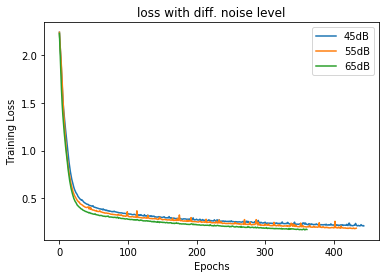

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('loss with diff. noise level')
plt.plot(hist1.history['loss'])
plt.plot(hist2.history['loss'])
plt.plot(hist3.history['loss'])
plt.savefig('loss with diff. noise level.fig', format='eps', dpi=1000)
#plt.savefig('loss with diff. optimizers.eps', format='eps', dpi=1000)
plt.legend(['45dB','55dB','65dB'])

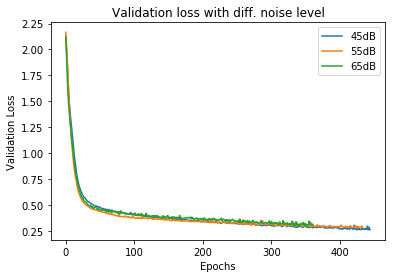

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation loss with diff. noise level')
#plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
#plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
#plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.legend(['45dB','55dB','65dB'])
plt.savefig('Validation loss with diff. noise level.fig', format='eps', dpi=1000)
#plt.savefig('Validation loss with diff. optimizers.eps', format='eps', dpi=1000)

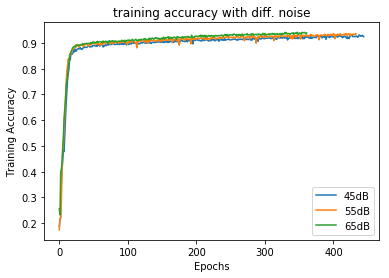

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.plot(hist1.history['acc'])
plt.title('training accuracy with diff. noise')
#plt.plot(hist1.history['val_loss'])
plt.plot(hist2.history['acc'])
#plt.plot(hist2.history['val_loss'])
plt.plot(hist3.history['acc'])
plt.legend(['45dB','55dB','65dB'])
plt.savefig('training accuracy with diff. noise.fig', format='eps', dpi=1000)
#plt.savefig('training accuracy with diff. optimizers.eps', format='eps', dpi=1000)

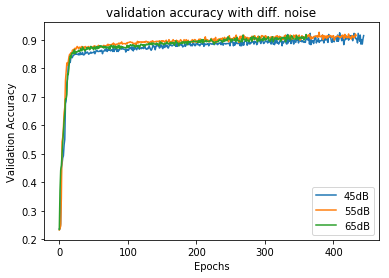

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('validation accuracy with diff. noise')
plt.plot(hist1.history['val_acc'])
plt.plot(hist2.history['val_acc'])
plt.plot(hist3.history['val_acc'])
plt.legend(['45dB','55dB','65dB'])
plt.savefig('validation accuracy with diff. noise.fig', format='eps', dpi=1000)
plt.savefig('validation accuracy with diff. optimizers.eps', format='eps', dpi=1000)